In [14]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from scipy.stats import linregress

In [15]:
#emission data
emiss_csv = "Resources/cleaned_upollution_2005_2016.csv"
emiss_df = pd.read_csv(emiss_csv)

#determine earliest sample year
min_group = emiss_df.groupby(['State']).min()

#group.head()

#only states w data from '05 onward
states_df = min_group.loc[min_group['Sample Year'] == 2005].reset_index()
em_st = states_df['State']
#em_st

#pull only states w data from 05 from annual data
ann_emiss = emiss_df.groupby(['State', 'Sample Year']).mean().reset_index()

ann_emiss = ann_emiss[ann_emiss.State.isin(em_st)]

#ann_emiss.groupby(['State', 'Sample Year']).mean()

ann_emiss = ann_emiss.groupby(['Sample Year']).mean()

ann_emiss

,Sample Month,Average of NO2 Mean,Average of O3 Mean,Average of SO2 Mean,Average of CO Mean
Sample Year,,,,,
2005,6.473684,15.684710,0.025133,3.194487,0.445421
2006,6.479532,14.869245,0.025447,3.175568,0.439297
2007,6.263158,14.183081,0.024907,2.711292,0.406916
2008,6.372222,13.614705,0.024977,2.397886,0.369068
2009,6.531250,12.228444,0.024375,1.907799,0.329106
2010,6.372159,12.497743,0.026131,1.846468,0.352010
2011,6.468750,13.158366,0.026269,1.612835,0.324969
2012,6.525568,12.718307,0.027129,1.158833,0.324887
2013,6.676471,11.671299,0.025579,1.082886,0.278182


In [16]:
#carbon data
from numpy import int64

carb_csv = "Resources/CO2_by_state.csv"
carb_df = pd.read_csv(carb_csv)

carb_df.columns = carb_df.iloc[1]

carb_df.drop(carb_df.index[1], inplace=True)

carb_df.rename(columns={'Million metric tons of carbon dioxide':'State'}, inplace=True)

#same states and range of dates
carb_df = carb_df[carb_df.State.isin(em_st)]

carb_df = carb_df.drop(columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998'])

carb_df = carb_df.drop(columns=['1999','2000','2001','2002','2003','2004'])

#sum states
carb_df['2005'] = pd.to_numeric(carb_df['2005'],errors ='coerce')
carb_df['2006'] = pd.to_numeric(carb_df['2006'],errors ='coerce')
carb_df['2007'] = pd.to_numeric(carb_df['2007'],errors ='coerce')
carb_df['2008'] = pd.to_numeric(carb_df['2008'],errors ='coerce')
carb_df['2009'] = pd.to_numeric(carb_df['2009'],errors ='coerce')
carb_df['2010'] = pd.to_numeric(carb_df['2010'],errors ='coerce')
carb_df['2011'] = pd.to_numeric(carb_df['2011'],errors ='coerce')
carb_df['2012'] = pd.to_numeric(carb_df['2012'],errors ='coerce')
carb_df['2013'] = pd.to_numeric(carb_df['2013'],errors ='coerce')
carb_df['2014'] = pd.to_numeric(carb_df['2014'],errors ='coerce')
carb_df['2015'] = pd.to_numeric(carb_df['2015'],errors ='coerce')
carb_df['2016'] = pd.to_numeric(carb_df['2016'],errors ='coerce')
carb_df['2017'] = pd.to_numeric(carb_df['2017'],errors ='coerce')

carb_df.loc['Total'] = carb_df.sum(numeric_only=True)

carb_dft = carb_df.T

carb_dft.columns = carb_dft.iloc[0]

carb_dft.drop(carb_dft.index[0], inplace=True)

#breaks here therefore cannot plot bc NaN col
carb_dft.rename(columns={'Nan':'Total'}, inplace=True)

carb_dft = carb_dft.drop(['Percent', 'Absolute', '2017'])

carb_dft = carb_dft[:-1]

carb_dft.tail()

State,Arizona,California,Colorado,Florida,Illinois,Indiana,Kansas,Louisiana,Massachusetts,Michigan,Missouri,New Hampshire,New Jersey,New York,North Carolina,Oklahoma,Pennsylvania,Texas,NaN
1,,,,,,,,,,,,,,,,,,,
2012,91,351,90,222,216,194,66,226,61,152,126,14,103,159,121,104,236,661,3193
2013,95,353,91,220,229,199,69,218,65,160,131,14,106,160,124,103,245,694,3276
2014,93,350,91,226,232,205,69,215,63,160,131,15,112,168,127,104,245,690,3296
2015,90,358,90,230,215,185,64,217,65,161,122,15,110,166,120,100,229,690,3227
2016,87,357,87,228,203,181,62,219,63,151,117,14,110,162,120,96,215,692,3164


In [17]:
#GDP data
gdp_csv = "Resources/GDP_by_state.csv"
gdp_df = pd.read_csv(gdp_csv)

gdp_df = gdp_df.drop(columns=["GeoFips"])

#same states as above
gdp_df = gdp_df[gdp_df.GeoName.isin(em_st)]

#sum states
gdp_df.loc['Total']= gdp_df.sum(numeric_only=True)

gdp_df = gdp_df.groupby(gdp_df.columns.str.split(":").str[0], axis=1).sum()

gdp_dft = gdp_df.T

gdp_dft.columns = gdp_dft.iloc[15]

gdp_dft.drop(gdp_dft.index[15], inplace=True)

gdp_dft = gdp_dft.drop(['2017','2018', '2019'])

gdp_dft

GeoName,Arizona,California,Colorado,Florida,Illinois,Indiana,Kansas,Louisiana,Massachusetts,Michigan,Missouri,New Hampshire,New Jersey,New York,North Carolina,Oklahoma,Pennsylvania,Texas,0
2005,1.05224e+06,7.96056e+06,1.00336e+06,3.22535e+06,2.74359e+06,1.14197e+06,489031,982092,1.56317e+06,1.80298e+06,1.04612e+06,257426,2.05399e+06,4.6842e+06,1.62997e+06,572290,2.35222e+06,4.53118e+06,3.90918e+07
2006,1.10915e+06,8.28871e+06,1.0245e+06,3.33738e+06,2.81798e+06,1.16508e+06,515597,973330,1.59097e+06,1.77323e+06,1.05293e+06,263780,2.09622e+06,4.79962e+06,1.73036e+06,610636,2.36812e+06,4.84115e+06,4.03587e+07
2007,1.13963e+06,8.41447e+06,1.05831e+06,3.34347e+06,2.85084e+06,1.19769e+06,542669,938481,1.6319e+06,1.76459e+06,1.05753e+06,262792,2.10726e+06,4.8109e+06,1.74575e+06,621859,2.44807e+06,5.09721e+06,4.10334e+07
2008,1.10991e+06,8.44455e+06,1.07085e+06,3.21287e+06,2.79772e+06,1.19306e+06,554632,941105,1.6504e+06,1.66681e+06,1.08243e+06,260067,2.13222e+06,4.70188e+06,1.78768e+06,645446,2.49529e+06,5.10309e+06,4.085e+07
2009,1.02032e+06,8.10595e+06,1.04952e+06,3.03306e+06,2.73186e+06,1.1099e+06,533107,954664,1.63225e+06,1.52036e+06,1.06124e+06,257798,2.0446e+06,4.89292e+06,1.70843e+06,636943,2.42199e+06,5.08574e+06,3.98006e+07
2010,1.02994e+06,8.23255e+06,1.05916e+06,3.0648e+06,2.77984e+06,1.18053e+06,539778,989404,1.69833e+06,1.60377e+06,1.07894e+06,265766,2.06636e+06,5.07795e+06,1.73362e+06,636906,2.48987e+06,5.20691e+06,4.07344e+07
2011,1.05284e+06,8.36634e+06,1.07472e+06,3.05498e+06,2.82824e+06,1.18589e+06,554250,936251,1.73889e+06,1.64586e+06,1.0669e+06,267360,2.04371e+06,5.07698e+06,1.75635e+06,660612,2.52549e+06,5.37516e+06,4.12109e+07
2012,1.07316e+06,8.57799e+06,1.09408e+06,3.07724e+06,2.88281e+06,1.19021e+06,561911,934492,1.77732e+06,1.67543e+06,1.07505e+06,270757,2.07898e+06,5.28979e+06,1.75828e+06,693935,2.56527e+06,5.64551e+06,4.22222e+07
2013,1.0806e+06,8.88347e+06,1.13014e+06,3.13636e+06,2.89847e+06,1.21568e+06,562022,906464,1.77946e+06,1.69728e+06,1.08761e+06,275201,2.09334e+06,5.27719e+06,1.78145e+06,710406,2.60528e+06,5.88841e+06,4.30088e+07
2014,1.09471e+06,9.25016e+06,1.18279e+06,3.22111e+06,2.94014e+06,1.25496e+06,573702,934703,1.81554e+06,1.72604e+06,1.09268e+06,278179,2.10291e+06,5.39707e+06,1.82018e+06,750956,2.66598e+06,6.09223e+06,4.41941e+07


In [18]:
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x*slope + intercept
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    return regress_values

#Creating function to return a string of linear regression equation
def linear_regression_eq(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2)) +", r= " + str(round(rvalue,2))
    return line_eq

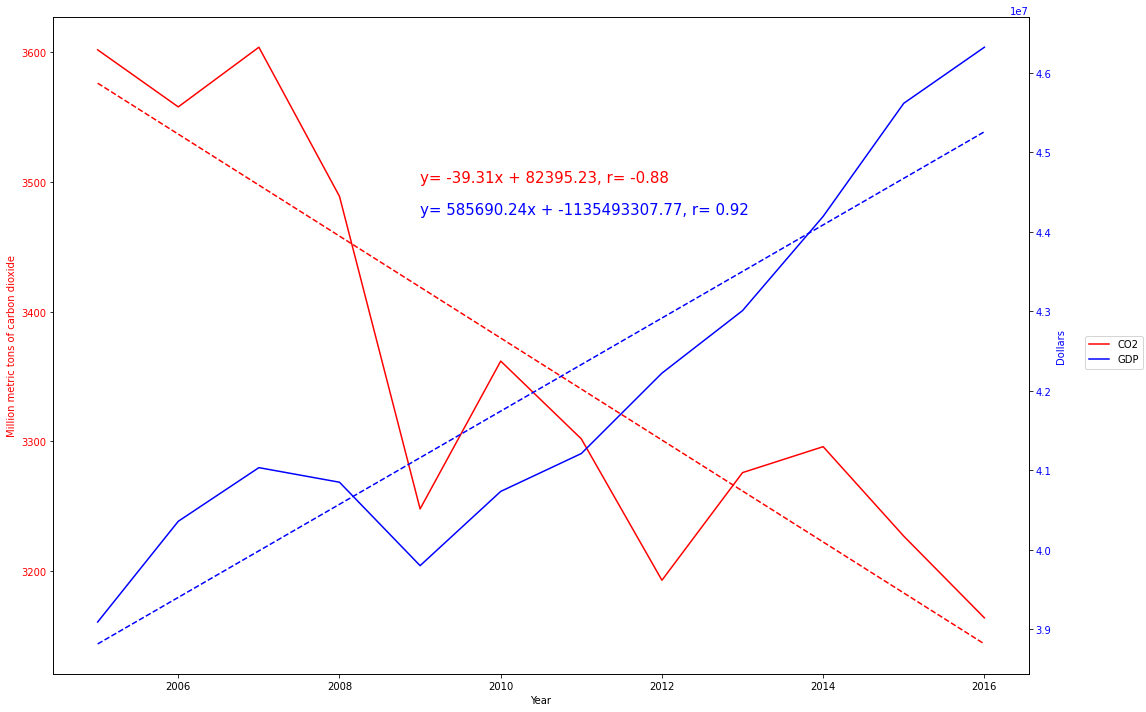

In [35]:
years = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

carb_ls = np.asarray(carb_dft.iloc[:,-1].tolist())
gdp_ls = np.asarray(gdp_dft.iloc[:,-1].tolist())

carb_line = linear_regression(years, carb_ls)
carb_line_eq = linear_regression_eq(years, carb_ls)

gdp_line = linear_regression(years, gdp_ls)
gdp_line_eq = linear_regression_eq(years, gdp_ls)

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Million metric tons of carbon dioxide', color=color)
ax1.plot(years, carb_ls, color=color, label = "CO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,carb_line,color = 'red', linestyle = '--')
ax1.annotate(carb_line_eq, (2009,3500), fontsize = 15, color = "red")
ax1.annotate(gdp_line_eq, (2009,3475), fontsize = 15, color = "blue")
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Dollars', color=color)
ax2.plot(years, gdp_ls, color=color, label = "GDP")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(years,gdp_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/CO2_vs_GDP.png')

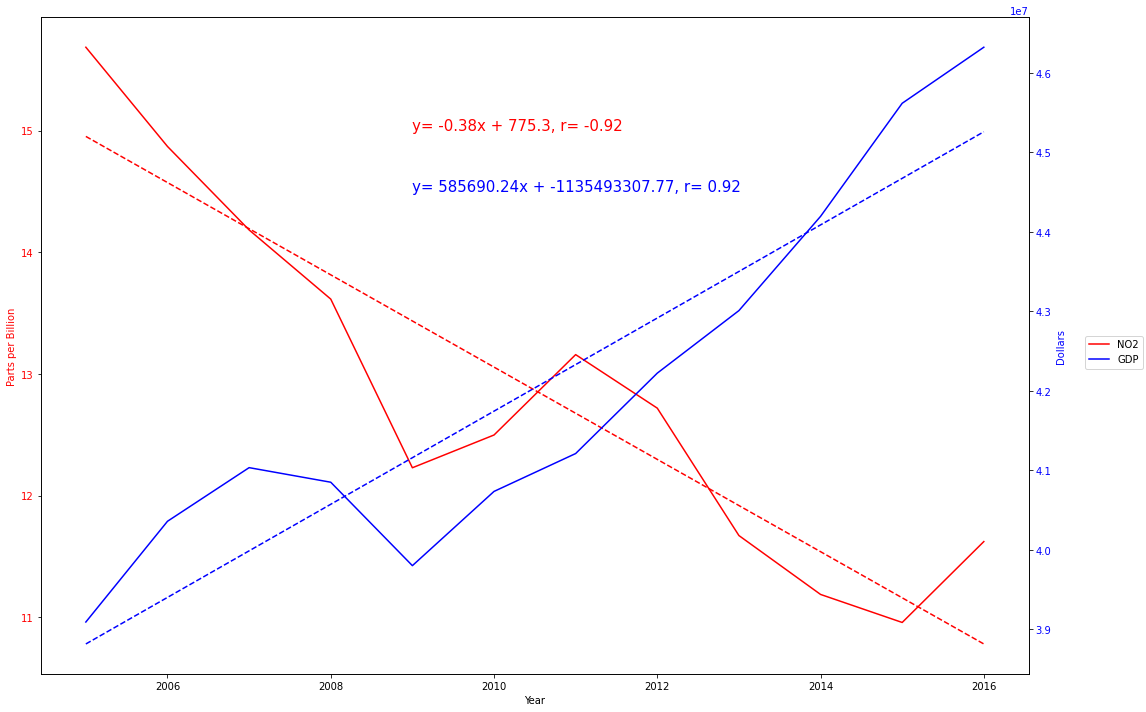

In [41]:
#NO2

years = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

no2_ls = np.asarray(ann_emiss.iloc[:,-4].tolist())
gdp_ls = np.asarray(gdp_dft.iloc[:,-1].tolist())

no2_line = linear_regression(years, no2_ls)
no2_line_eq = linear_regression_eq(years, no2_ls)

gdp_line = linear_regression(years, gdp_ls)
gdp_line_eq = linear_regression_eq(years, gdp_ls)

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts per Billion', color=color)
ax1.plot(years, no2_ls, color=color, label = "NO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,no2_line,color = 'red', linestyle = '--')
ax1.annotate(no2_line_eq, (2009,15), fontsize = 15, color = "red")
ax1.annotate(gdp_line_eq, (2009,14.5), fontsize = 15, color = "blue")
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Dollars', color=color)
ax2.plot(years, gdp_ls, color=color, label = "GDP")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(years,gdp_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/NO2_vs_GDP.png')

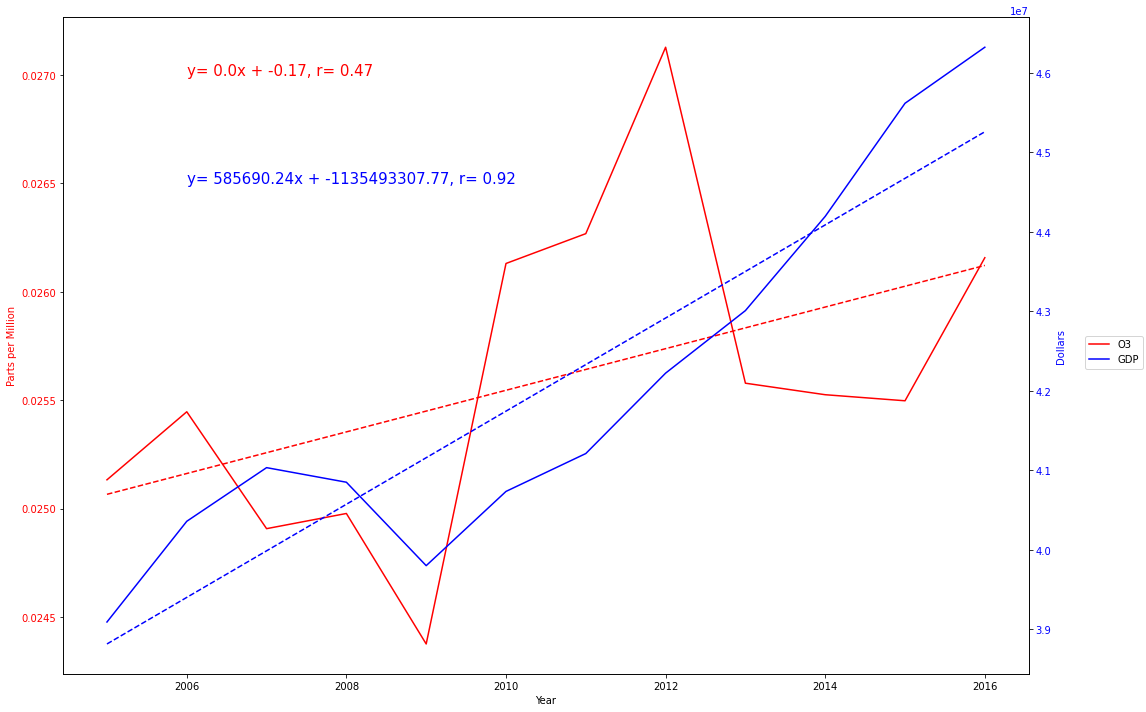

In [40]:
#O3
years = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

o3_ls = np.asarray(ann_emiss.iloc[:,-3].tolist())
gdp_ls = np.asarray(gdp_dft.iloc[:,-1].tolist())

o3_line = linear_regression(years, o3_ls)
o3_line_eq = linear_regression_eq(years, o3_ls)

gdp_line = linear_regression(years, gdp_ls)
gdp_line_eq = linear_regression_eq(years, gdp_ls)

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts per Million', color=color)
ax1.plot(years, o3_ls, color=color, label = "O3")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,o3_line,color = 'red', linestyle = '--')
ax1.annotate(o3_line_eq, (2006,.027), fontsize = 15, color = "red")
ax1.annotate(gdp_line_eq, (2006,.0265), fontsize = 15, color = "blue")
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Dollars', color=color)
ax2.plot(years, gdp_ls, color=color, label = "GDP")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(years,gdp_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/O3_vs_GDP.png')

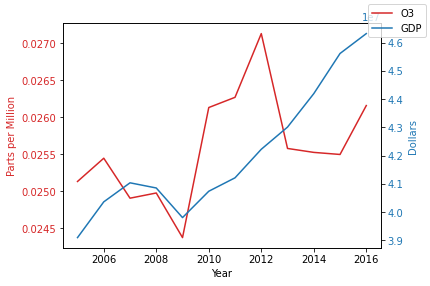

,State,Sample Year,Sample Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971


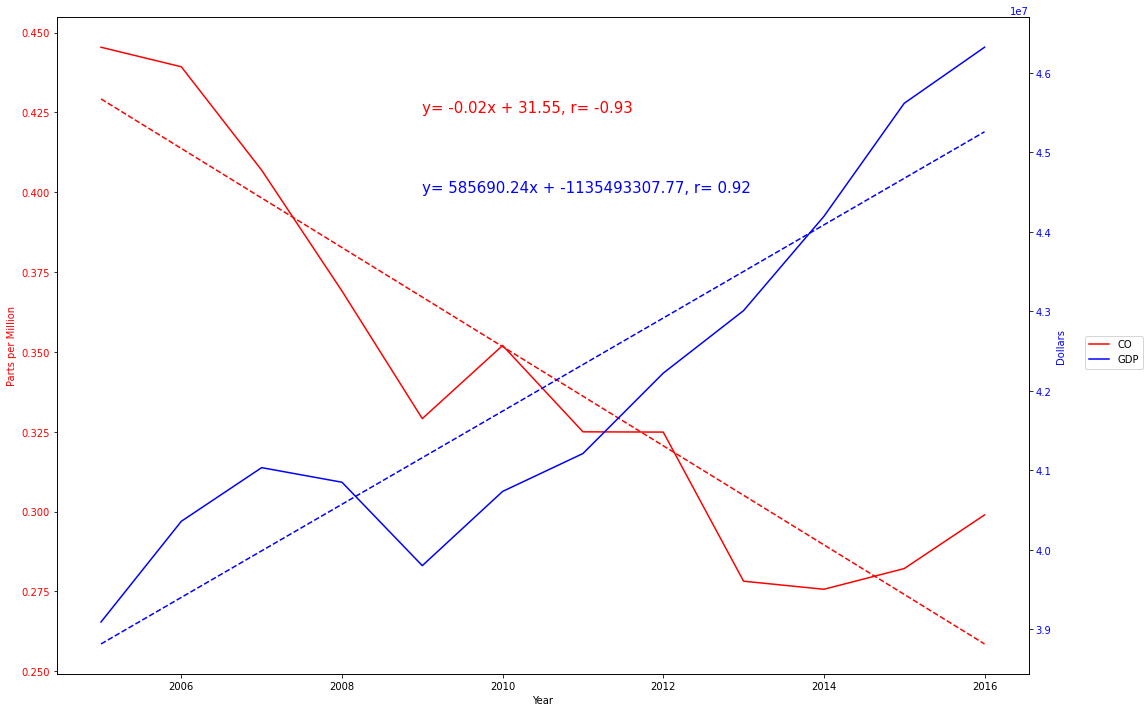

In [42]:
#CO Chart
years = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

co_ls = np.asarray(ann_emiss.iloc[:,-1].tolist())
gdp_ls = np.asarray(gdp_dft.iloc[:,-1].tolist())

co_line = linear_regression(years, co_ls)
co_line_eq = linear_regression_eq(years, co_ls)

gdp_line = linear_regression(years, gdp_ls)
gdp_line_eq = linear_regression_eq(years, gdp_ls)

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts per Million', color=color)
ax1.plot(years, co_ls, color=color, label = "CO")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,co_line,color = 'red', linestyle = '--')
ax1.annotate(co_line_eq, (2009,.425), fontsize = 15, color = "red")
ax1.annotate(gdp_line_eq, (2009,.400), fontsize = 15, color = "blue")
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Dollars', color=color)
ax2.plot(years, gdp_ls, color=color, label = "GDP")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(years,gdp_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/CO_vs_GDP.png')

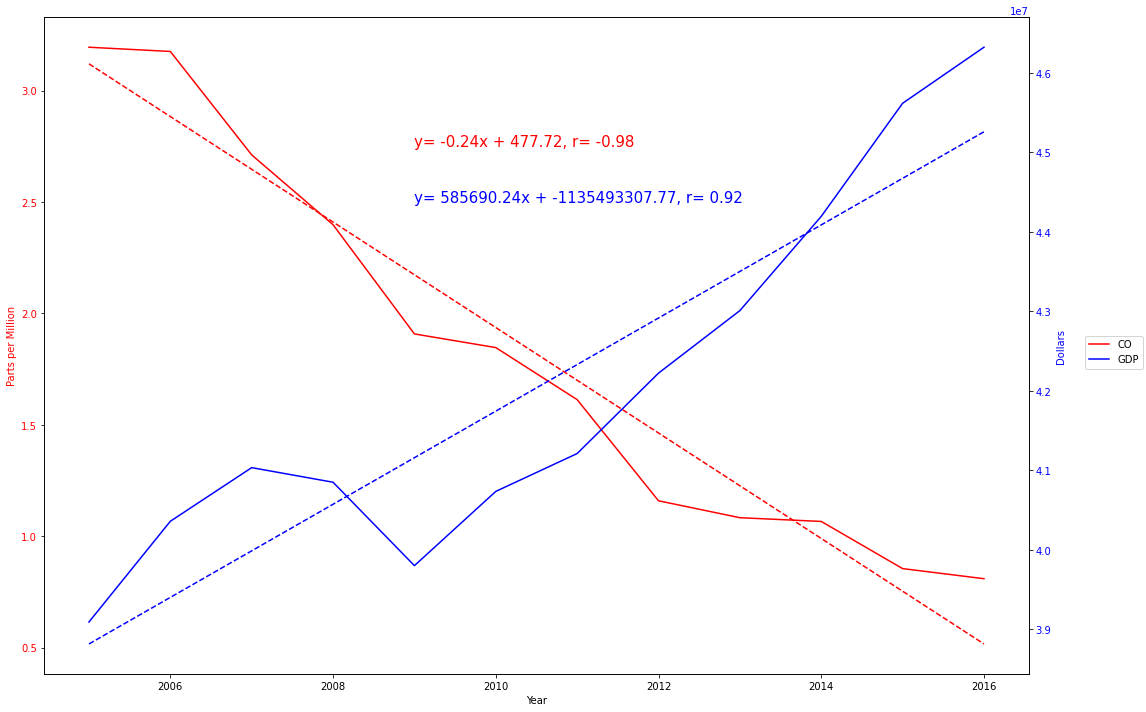

In [43]:
#SO2 Chart
years = np.asarray([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

so2_ls = np.asarray(ann_emiss.iloc[:,-2].tolist())
gdp_ls = np.asarray(gdp_dft.iloc[:,-1].tolist())

so2_line = linear_regression(years, so2_ls)
so2_line_eq = linear_regression_eq(years, so2_ls)

gdp_line = linear_regression(years, gdp_ls)
gdp_line_eq = linear_regression_eq(years, gdp_ls)

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts per Million', color=color)
ax1.plot(years, so2_ls, color=color, label = "CO")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,so2_line,color = 'red', linestyle = '--')
ax1.annotate(so2_line_eq, (2009,2.75), fontsize = 15, color = "red")
ax1.annotate(gdp_line_eq, (2009,2.5), fontsize = 15, color = "blue")
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Dollars', color=color)
ax2.plot(years, gdp_ls, color=color, label = "GDP")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(years,gdp_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/SO2_vs_GDP.png')